<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pyxirr

In [12]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-10-20 18:18:58
-------------------
qualified stocks: 85
with latest results: 81
still star stocks: 40
-------------------
Initial Investment:  95.62 L
CY Investment:  1.09 C
Reserve:  2.25 L
Current:  1.21 C
-------------------
Today PnL: -18.95 K (-0.16%)
Current PnL: 3.50 L (3.22%)
CY Booked + Current PnL: 11.89 L (10.93%)
-------------------
Total profit:  10.11 L
Total loss:  -6.61 L
-------------------
Total Booked + Current PnL: 25.00 L (26.14%)
Total Booked PnL: 21.50 L (22.48%)
Curr Year Booked PnL: 8.39 L (6.94%)
Prev Year Booked PnL: 13.11 L (13.71%)
Est FTT:  1.84 C
Est FTT PnL: 63.29 L (52.35%)
-------------------
Est LTT:  2.32 C
Est LTT PnL: 1.11 C (91.95%)
Deployed:  95.62 L
Current:  1.21 C
CAGR/XIRR %: 23.89%


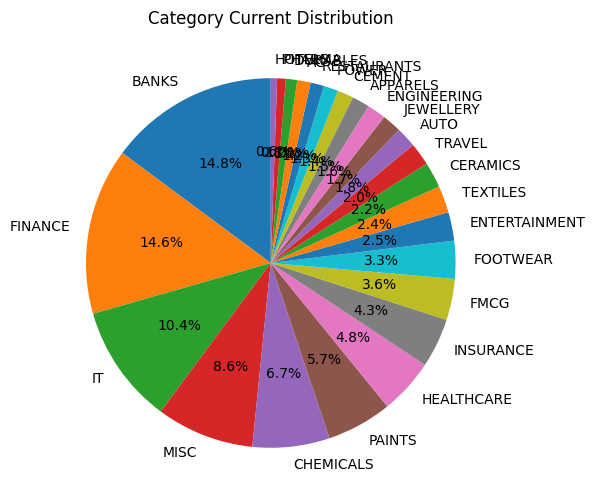

In [13]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [14]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1857.70,2006.00,47.81,92.94,139328.0,38153.0,11118.0,-0.54,37.71,7.98,48.70,125.0,3.43,1.17,55.55,X40,BTT,IT
47,LALPATHLAB,2519.90,3356.10,3689.00,3.70,89.41,120820.0,30104.0,11985.0,1.31,33.18,9.92,46.39,60.0,2.51,1.02,67.55,X40N,NTT,HEALTHCARE
42,JMFINANCIL,82.95,158.69,172.00,200.25,100.00,186778.0,89146.0,15671.0,1.76,91.31,8.39,107.35,123.0,5.69,1.57,126.34,XR,NTT,FINANCE
49,LTIM,5051.49,5991.70,7286.80,21.49,42.35,95867.0,15043.0,20717.0,-6.30,18.61,21.61,44.25,22.0,0.73,0.81,31.60,X200,ATH,IT
55,PIDILITIND,2482.94,3184.00,3576.00,-2.09,76.47,184672.0,40661.0,22733.0,0.94,28.24,12.31,44.02,20.0,1.79,1.56,39.41,X40,BTT,CHEMICALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,VAIBHAVGBL,350.21,290.65,670.00,3.55,41.18,126142.0,-25849.0,164641.0,-1.04,-17.01,130.52,91.31,-19.0,-0.16,1.06,5.62,XR,NTT,JEWELLERY
18,CAMPUS,294.86,301.85,631.85,16.07,10.59,171753.0,3978.0,187778.0,-0.15,2.37,109.33,114.29,37.0,0.02,1.45,40.72,XSP,ATH,FOOTWEAR
11,BANDHANBNK,223.20,191.96,400.00,-32.89,15.29,187545.0,-30521.0,203261.0,0.93,-14.00,108.38,79.21,-6.0,-0.15,1.58,11.62,XSP,NTT,BANKS
73,TANLA,991.56,824.05,2007.31,-31.18,7.06,182115.0,-37020.0,261499.0,-3.84,-16.89,143.59,102.44,-17.0,-0.14,1.53,3.05,AR,ATH,IT


In [15]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
49,LTIM,5051.49,5991.70,7286.80,21.49,42.35,95867.0,15043.0,20717.0,-6.30,18.61,21.61,44.25,22.0,0.73,0.81,31.60,X200,ATH,IT
37,INDUSINDBK,1354.50,1347.25,1800.00,-23.68,18.82,76793.0,-414.0,25810.0,-0.01,-0.54,33.61,32.89,0.0,-0.02,0.65,0.68,XR,NTT,BANKS
15,BAYERCROP,4346.57,6576.05,8325.00,26.89,84.71,105217.0,35672.0,27988.0,-1.68,51.29,26.60,91.53,39.0,1.27,0.89,38.76,X40N,BTT,CHEMICALS
22,DABUR,523.35,571.40,735.00,-2.81,4.71,99995.0,8409.0,28629.0,-0.20,9.18,28.63,40.44,9.0,0.29,0.84,15.88,X40,BTT,FMCG
78,TTKPRESTIG,769.29,894.80,1149.24,29.38,77.65,117219.0,16442.0,33337.0,-0.39,16.32,28.44,49.39,21.0,0.49,0.99,34.64,X40N,ATH,DURABLES
7,ATULAUTO,656.09,628.05,844.00,NaN,48.82,99232.0,-4430.0,34116.0,-2.08,-4.27,34.38,28.64,-43.0,-0.13,0.84,32.03,XSP,NTT,AUTO
25,FINEORG,4771.46,5055.10,7168.71,0.76,35.29,85937.0,4822.0,35930.0,-1.10,5.94,41.81,50.24,5.0,0.13,0.72,25.52,X40N,ATH,CHEMICALS
83,VIPIND,488.80,520.20,718.00,NaN,91.76,101439.0,6123.0,38567.0,1.02,6.42,38.02,46.89,174.0,0.16,0.85,20.39,X40N,NTT,MISC
80,UNIONBANK,124.65,112.22,163.00,-12.15,21.18,90225.0,-9994.0,40827.0,0.62,-9.97,45.25,30.77,-73.0,-0.24,0.76,21.57,XSP,NTT,BANKS
23,DEN,52.79,48.55,75.00,-10.40,8.24,77680.0,-6784.0,42320.0,-1.26,-8.03,54.48,42.07,-2.0,-0.16,0.65,9.47,AR,NTT,ENTERTAINMENT


In [16]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,330.35,387.00,-5.02,54.12,163193.0,4994.0,27988.0,0.36,3.16,17.15,20.85,116.0,0.18,1.38,59.90,XSP,BTT,FINANCE
7,ATULAUTO,656.09,628.05,844.00,NaN,48.82,99232.0,-4430.0,34116.0,-2.08,-4.27,34.38,28.64,-43.0,-0.13,0.84,32.03,XSP,NTT,AUTO
67,SHALBY,271.92,259.00,327.00,NaN,27.06,143227.0,-7145.0,37597.0,-0.27,-4.75,26.25,20.26,-10.0,-0.19,1.21,20.50,XSP,NTT,HEALTHCARE
16,BERGEPAINT,558.54,556.35,680.00,-26.54,14.12,176363.0,-694.0,39205.0,-0.32,-0.39,22.23,21.75,0.0,-0.02,1.49,22.87,XSP,NTT,PAINTS
56,QUESS,716.17,753.95,986.00,-9.83,12.94,131941.0,6611.0,40611.0,3.16,5.28,30.78,37.68,10.0,0.16,1.11,86.12,XSP,NTT,MISC
80,UNIONBANK,124.65,112.22,163.00,-12.15,21.18,90225.0,-9994.0,40827.0,0.62,-9.97,45.25,30.77,-73.0,-0.24,0.76,21.57,XSP,NTT,BANKS
43,JPPOWER,18.73,20.01,26.20,-59.43,97.65,151536.0,9694.0,46870.0,0.55,6.83,30.93,39.88,246.0,0.21,1.28,128.69,XSP,NTT,POWER
70,STARHEALTH,596.56,550.45,761.00,-19.32,20.00,147521.0,-12357.0,56427.0,0.15,-7.73,38.25,27.56,-9.0,-0.22,1.24,10.26,XSP,NTT,INSURANCE
76,TITAGARH,1117.46,1197.50,1548.00,15.80,40.00,195192.0,13046.0,57133.0,2.35,7.16,29.27,38.53,NaN,0.23,1.65,61.65,XSP,NTT,ENGINEERING
28,GREENPANEL,390.01,403.65,537.00,38.91,83.53,178817.0,6043.0,59081.0,-2.17,3.50,33.04,37.69,4.0,0.10,1.51,41.01,XSP,NTT,MISC


In [17]:
# XSP for average up
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,330.35,387.00,-5.02,54.12,163193.0,4994.0,27988.0,0.36,3.16,17.15,20.85,116.0,0.18,1.38,59.90,XSP,BTT,FINANCE
7,ATULAUTO,656.09,628.05,844.00,NaN,48.82,99232.0,-4430.0,34116.0,-2.08,-4.27,34.38,28.64,-43.0,-0.13,0.84,32.03,XSP,NTT,AUTO
67,SHALBY,271.92,259.00,327.00,NaN,27.06,143227.0,-7145.0,37597.0,-0.27,-4.75,26.25,20.26,-10.0,-0.19,1.21,20.50,XSP,NTT,HEALTHCARE
16,BERGEPAINT,558.54,556.35,680.00,-26.54,14.12,176363.0,-694.0,39205.0,-0.32,-0.39,22.23,21.75,0.0,-0.02,1.49,22.87,XSP,NTT,PAINTS
56,QUESS,716.17,753.95,986.00,-9.83,12.94,131941.0,6611.0,40611.0,3.16,5.28,30.78,37.68,10.0,0.16,1.11,86.12,XSP,NTT,MISC
80,UNIONBANK,124.65,112.22,163.00,-12.15,21.18,90225.0,-9994.0,40827.0,0.62,-9.97,45.25,30.77,-73.0,-0.24,0.76,21.57,XSP,NTT,BANKS
43,JPPOWER,18.73,20.01,26.20,-59.43,97.65,151536.0,9694.0,46870.0,0.55,6.83,30.93,39.88,246.0,0.21,1.28,128.69,XSP,NTT,POWER
70,STARHEALTH,596.56,550.45,761.00,-19.32,20.00,147521.0,-12357.0,56427.0,0.15,-7.73,38.25,27.56,-9.0,-0.22,1.24,10.26,XSP,NTT,INSURANCE
76,TITAGARH,1117.46,1197.50,1548.00,15.80,40.00,195192.0,13046.0,57133.0,2.35,7.16,29.27,38.53,NaN,0.23,1.65,61.65,XSP,NTT,ENGINEERING
28,GREENPANEL,390.01,403.65,537.00,38.91,83.53,178817.0,6043.0,59081.0,-2.17,3.50,33.04,37.69,4.0,0.10,1.51,41.01,XSP,NTT,MISC


In [26]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.38
1,20,35.17
2,30,49.62


In [24]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,33.40
X40,21.07
XR,19.63
X40N,17.62
AR,5.81
SR,1.67
X200,0.81
